In [47]:
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, DoubleType, DateType
from datetime import date
from pyspark.sql import SparkSession
import os
output_dir = "./sales_viz/"
os.makedirs(output_dir, exist_ok=True)
spark = SparkSession.builder.getOrCreate()
schema = StructType([
StructField("order_id", StringType()),
StructField("region", StringType()),
StructField("category", StringType()),
StructField("quantity", IntegerType()),
StructField("price", DoubleType()),
StructField("order_date", DateType())
])
data = [
("O001", "South", "Electronics", 3, 15000.0, date(2025, 1, 5)),
("O002", "North", "Clothing", 5, 2000.0, date(2025, 1, 6)),
("O003", "East", "Furniture", 2, 12000.0, date(2025, 1, 7)),
("O004", "West", "Electronics", 1, 18000.0, date(2025, 1, 8)),
("O005", "North", "Furniture", 4, 9000.0, date(2025, 1, 10)),
("O006", "South", "Clothing", 6, 2500.0, date(2025, 1, 11)),
("O007", "East", "Electronics", 2, 17000.0, date(2025, 1, 12)),
("O008", "South", "Furniture", 5, 8500.0, date(2025, 1, 15)),
("O009", "West", "Clothing", 7, 3000.0, date(2025, 1, 17)),
("O010", "North", "Electronics", 4, 16000.0, date(2025, 1, 18))
]
df = spark.createDataFrame(data, schema)
df.show()

+--------+------+-----------+--------+-------+----------+
|order_id|region|   category|quantity|  price|order_date|
+--------+------+-----------+--------+-------+----------+
|    O001| South|Electronics|       3|15000.0|2025-01-05|
|    O002| North|   Clothing|       5| 2000.0|2025-01-06|
|    O003|  East|  Furniture|       2|12000.0|2025-01-07|
|    O004|  West|Electronics|       1|18000.0|2025-01-08|
|    O005| North|  Furniture|       4| 9000.0|2025-01-10|
|    O006| South|   Clothing|       6| 2500.0|2025-01-11|
|    O007|  East|Electronics|       2|17000.0|2025-01-12|
|    O008| South|  Furniture|       5| 8500.0|2025-01-15|
|    O009|  West|   Clothing|       7| 3000.0|2025-01-17|
|    O010| North|Electronics|       4|16000.0|2025-01-18|
+--------+------+-----------+--------+-------+----------+



In [48]:
# 1. Load the dataset into a PySpark DataFrame and display the first 10 rows.
df.show(10)

+--------+------+-----------+--------+-------+----------+
|order_id|region|   category|quantity|  price|order_date|
+--------+------+-----------+--------+-------+----------+
|    O001| South|Electronics|       3|15000.0|2025-01-05|
|    O002| North|   Clothing|       5| 2000.0|2025-01-06|
|    O003|  East|  Furniture|       2|12000.0|2025-01-07|
|    O004|  West|Electronics|       1|18000.0|2025-01-08|
|    O005| North|  Furniture|       4| 9000.0|2025-01-10|
|    O006| South|   Clothing|       6| 2500.0|2025-01-11|
|    O007|  East|Electronics|       2|17000.0|2025-01-12|
|    O008| South|  Furniture|       5| 8500.0|2025-01-15|
|    O009|  West|   Clothing|       7| 3000.0|2025-01-17|
|    O010| North|Electronics|       4|16000.0|2025-01-18|
+--------+------+-----------+--------+-------+----------+



In [49]:
# 2. Create a new column revenue = quantity × price .
df = df.withColumn("revenue", df["quantity"] * df["price"])
df.show()

+--------+------+-----------+--------+-------+----------+-------+
|order_id|region|   category|quantity|  price|order_date|revenue|
+--------+------+-----------+--------+-------+----------+-------+
|    O001| South|Electronics|       3|15000.0|2025-01-05|45000.0|
|    O002| North|   Clothing|       5| 2000.0|2025-01-06|10000.0|
|    O003|  East|  Furniture|       2|12000.0|2025-01-07|24000.0|
|    O004|  West|Electronics|       1|18000.0|2025-01-08|18000.0|
|    O005| North|  Furniture|       4| 9000.0|2025-01-10|36000.0|
|    O006| South|   Clothing|       6| 2500.0|2025-01-11|15000.0|
|    O007|  East|Electronics|       2|17000.0|2025-01-12|34000.0|
|    O008| South|  Furniture|       5| 8500.0|2025-01-15|42500.0|
|    O009|  West|   Clothing|       7| 3000.0|2025-01-17|21000.0|
|    O010| North|Electronics|       4|16000.0|2025-01-18|64000.0|
+--------+------+-----------+--------+-------+----------+-------+



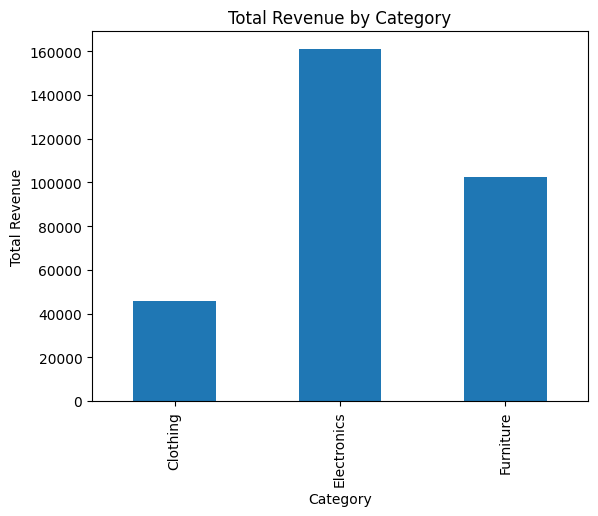

In [50]:
# 3. Generate a bar chart showing total revenue by category.
import pandas as pd
import matplotlib.pyplot as plt
pdf = df.toPandas()
category_revenue = pdf.groupby("category")["revenue"].sum()
category_revenue.plot(kind="bar")
plt.xlabel("Category")
plt.ylabel("Total Revenue")
plt.title("Total Revenue by Category")
plt.savefig(os.path.join(output_dir, "task3.png"))
plt.show()

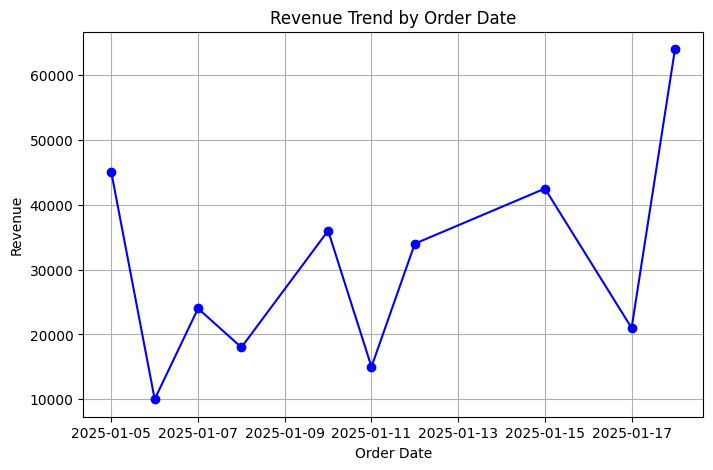

In [51]:
# 4. Create a line chart showing revenue trend by order_date (sorted by date).
plt.figure(figsize=(8,5))
plt.plot(pdf['order_date'], pdf['revenue'], marker='o', color='blue')
plt.title('Revenue Trend by Order Date')
plt.xlabel('Order Date')
plt.ylabel('Revenue')
plt.grid(True)
plt.savefig(os.path.join(output_dir, "task4.png"))
plt.show()

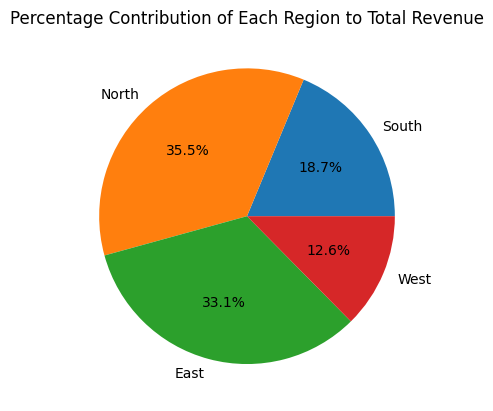

In [52]:
# 5. Create a pie chart showing percentage contribution of each region to total revenue.
plt.pie(pdf.groupby('region')['revenue'].sum(), labels=pdf['region'].unique(), autopct='%1.1f%%')
plt.title('Percentage Contribution of Each Region to Total Revenue')
plt.savefig(os.path.join(output_dir, "task5.png"))
plt.show()

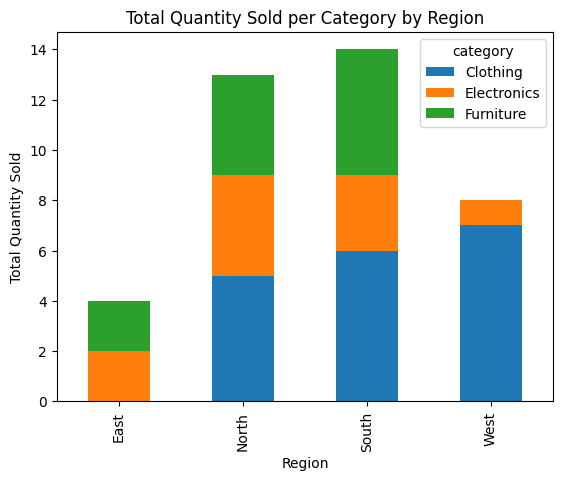

In [53]:
# 6. Create a stacked bar chart comparing total quantity sold per category by region.
category_quantity_by_region = pdf.groupby(['region', 'category'])['quantity'].sum().unstack()
category_quantity_by_region.plot(kind='bar', stacked=True)
plt.xlabel('Region')
plt.ylabel('Total Quantity Sold')
plt.title('Total Quantity Sold per Category by Region')
plt.savefig(os.path.join(output_dir, "task6.png"))
plt.show()

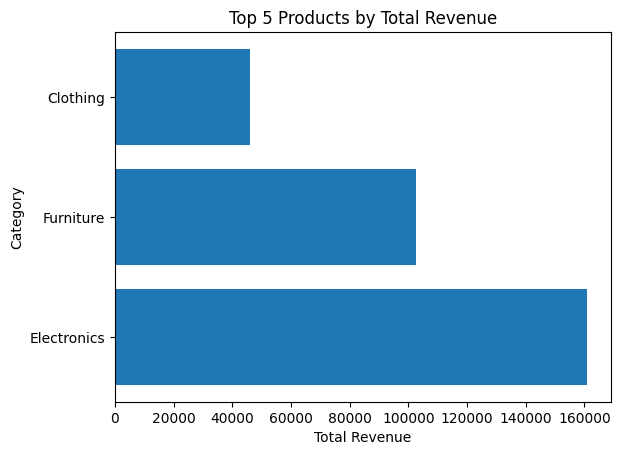

In [54]:
# 7. Filter and visualize only top 5 products by total revenue in a horizontal bar chart.
top_5_products = pdf.groupby('category')['revenue'].sum().nlargest(5)
plt.barh(top_5_products.index, top_5_products.values)
plt.xlabel('Total Revenue')
plt.ylabel('Category')
plt.title('Top 5 Products by Total Revenue')
plt.savefig(os.path.join(output_dir, "task7.png"))
plt.show()

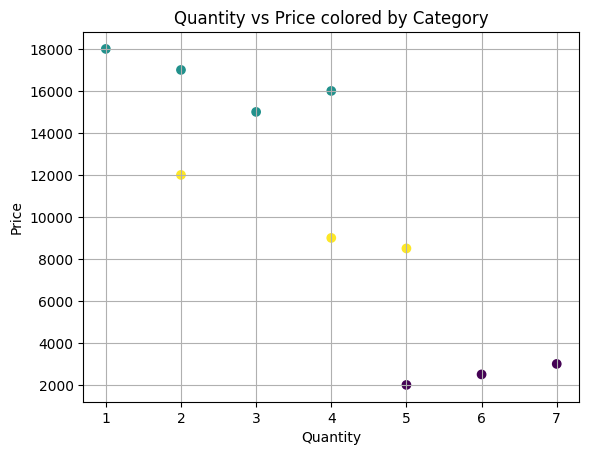

In [55]:
# 8. Create a scatter plot showing quantity vs price colored by category .
plt.scatter(pdf['quantity'], pdf['price'], c=pdf['category'].astype('category').cat.codes)
plt.xlabel('Quantity')
plt.ylabel('Price')
plt.grid(True)
plt.title('Quantity vs Price colored by Category')
plt.savefig(os.path.join(output_dir, "task8.png"))
plt.show()

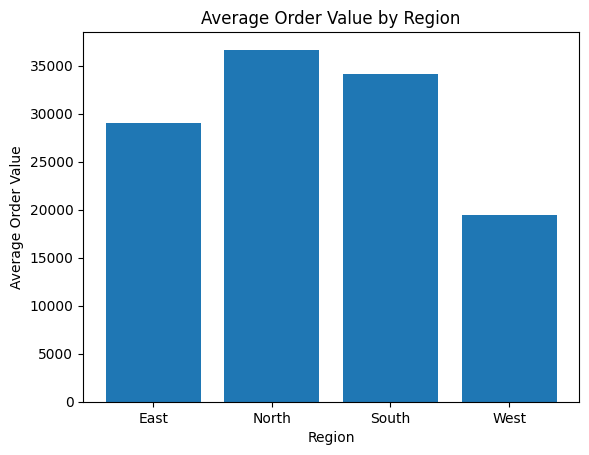

In [56]:
# 9. Find average order value by region and plot it as a bar chart.
avg_order_value_by_region = pdf.groupby('region')['revenue'].mean()
plt.bar(avg_order_value_by_region.index, avg_order_value_by_region.values)
plt.xlabel('Region')
plt.ylabel('Average Order Value')
plt.title('Average Order Value by Region')
plt.savefig(os.path.join(output_dir, "task9.png"))
plt.show()

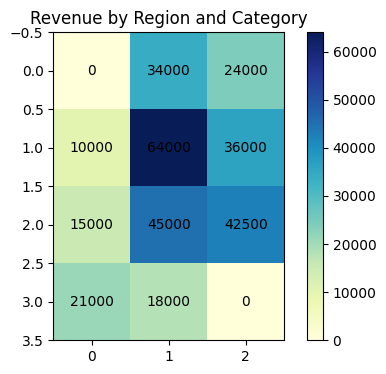

In [57]:
# 10. Create a heatmap (pivot table in Databricks) showing revenue by region and category.
pivot_table = pdf.pivot_table(index='region', columns='category', values='revenue', aggfunc='sum').fillna(0)
fig, ax = plt.subplots(figsize=(6,4))
im = ax.imshow(pivot_table.values, cmap='YlGnBu')
for i in range(len(pivot_table.index)):
    for j in range(len(pivot_table.columns)):
        ax.text(j, i, int(pivot_table.values[i, j]), ha='center', va='center', color='black')
ax.set_title('Revenue by Region and Category')
plt.savefig(os.path.join(output_dir, "task10.png"))
fig.colorbar(im)

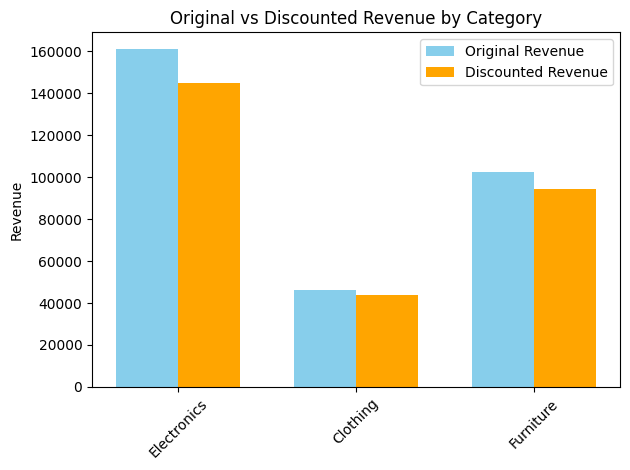

In [58]:
# 11. Bonus: Apply a discount column:
# Electronics → 10% discount
# Clothing → 5% discount
# Furniture → 8% discount Plot discounted vs original revenue for each category
# in a grouped bar chart.

from pyspark.sql import functions as F
import numpy as np
df = df.withColumn(
    "discount",
    F.when(F.col("category") == "Electronics", 0.10)
     .when(F.col("category") == "Clothing", 0.05)
     .when(F.col("category") == "Furniture", 0.08)
     .otherwise(0.0)
)
df = df.withColumn("discounted_revenue", F.col("revenue") * (1 - F.col("discount")))
agg_discount = df.groupBy("category").agg(
    F.sum("revenue").alias("original_revenue"),
    F.sum("discounted_revenue").alias("discounted_revenue")
).toPandas()

x = np.arange(len(agg_discount['category']))
width = 0.35

plt.bar(x - width/2, agg_discount['original_revenue'], width, label='Original Revenue', color='skyblue')
plt.bar(x + width/2, agg_discount['discounted_revenue'], width, label='Discounted Revenue', color='orange')

plt.xticks(x, agg_discount['category'], rotation=45)
plt.ylabel('Revenue')
plt.title('Original vs Discounted Revenue by Category')
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "task11.png"))
plt.show()

In [59]:
# 12. Save all visualizations-Done at each task